# <center> Ridge Regression with sklearn_ Data AuTo

## Setting Up the Workspace

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## The Working data

In [2]:
data= pd.read_csv('C:/Users/moham/Desktop/Python/Data/auto.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


A data frame with 392 observations on the following 9 variables.

__mpg__: miles per gallon

__cylinders__: Number of cylinders between 4 and 8

__displacement__: Engine displacement (cu. inches)

__horsepower__: Engine horsepower

__weight__: Vehicle weight (lbs.)

__acceleration__: Time to accelerate from 0 to 60 mph (sec.)

__year__: Model year (modulo 100)

__origin__: Origin of car (1. American, 2. European, 3. Japanese)

__name__: Vehicle name

The orginal data contained 408 observations but 16 observations with missing values were removed.

In [4]:
data.shape

(397, 9)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,397.0,23.515869,7.825804,9.0,17.5,23.0,29.0,46.6
cylinders,397.0,5.458438,1.701577,3.0,4.0,4.0,8.0,8.0
displacement,397.0,193.532746,104.379583,68.0,104.0,146.0,262.0,455.0
weight,397.0,2970.261965,847.904119,1613.0,2223.0,2800.0,3609.0,5140.0
acceleration,397.0,15.555668,2.749995,8.0,13.8,15.5,17.1,24.8
year,397.0,75.994962,3.690005,70.0,73.0,76.0,79.0,82.0
origin,397.0,1.574307,0.802549,1.0,1.0,1.0,2.0,3.0


In [6]:
data['name'].value_counts()

ford pinto             6
amc matador            5
ford maverick          5
toyota corolla         5
toyota corona          4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: name, Length: 304, dtype: int64

In [7]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [8]:
X=data[['cylinders', 'displacement', 'weight','acceleration']]
y=data['mpg']

# Linear Regression

In [9]:
# Import Linear Regression, and cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [10]:
Lreg= LinearRegression()

In [11]:
Lreg.fit(X, y)

LinearRegression()

In [12]:
coef= pd.DataFrame(list(zip(data.iloc[:, np.r_[1:3, 4:6]], Lreg.coef_)),
                       columns=['Variable',"coef"])
coef

,Variable,coef
0,cylinders,-0.272640
1,displacement,-0.006973
2,weight,-0.006142
3,acceleration,0.178213


In [13]:
print("The model intercept value is {:.4f}".format(Lreg.intercept_))

The model intercept value is 41.8258


# Prediction on training and testing sets LM

In [14]:
X_train, X_test, y_train, y_test = \
                               train_test_split(X, y, test_size=0.25, random_state=1711)

In [15]:
lm_TTS=LinearRegression()
lm_TTS.fit(X_train, y_train)

LinearRegression()

In [16]:
# Predict on train set
pred_train = lm_TTS.predict(X_train)
# Predict on test set
pred_test = lm_TTS.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer

In [18]:
print("The R^2 on the train set is: {:.4f}".format(r2_score(pred_train, y_train)))
print("The R^2 on the test set is: {:.4f}".format(r2_score(pred_test, y_test)))
print("The RMSE on the train set is: {:.4f}".\
      format(np.sqrt(mean_squared_error(y_train, pred_train))))
print("The RMSE on the test set is: {:.4f}".\
      format(np.sqrt(mean_squared_error(y_test, pred_test))))
print("The MAE on the train set is: {:.4f}".\
      format(np.sqrt(mean_absolute_error(y_train, pred_train))))
print("The MAE on the test set is: {:.4f}".\
      format(np.sqrt(mean_absolute_error(y_test, pred_test))))

The R^2 on the train set is: 0.6098
The R^2 on the test set is: 0.2364
The RMSE on the train set is: 4.0767
The RMSE on the test set is: 4.8950
The MAE on the train set is: 1.7600
The MAE on the test set is: 1.9248


In [19]:
# calculate the residuals
resid_train = y_train - pred_train
resid_test = y_test - pred_test

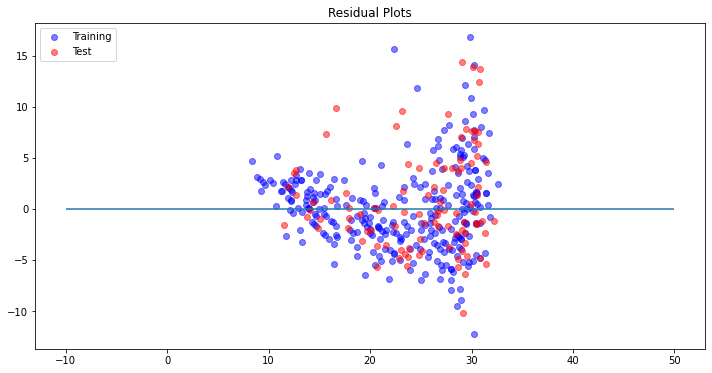

In [20]:
# Scatter plot the training data
plt.figure(figsize= (12, 6))
train = plt.scatter(x = pred_train, y = resid_train , c = 'b', alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test, resid_test , c = 'r', alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y = 0, xmin = -10, xmax = 50)

# Labels
plt.legend((train, test), ('Training','Test'), loc='upper left')
plt.title('Residual Plots')
plt.show()

# <center>Fitting Linear Regression Model Using Cross Validation

In [21]:
from sklearn.model_selection import cross_val_score

In [71]:
cv_res= cross_val_score(Lreg, X, y, cv=5)
avgR2=np.mean(cv_res)
cv_res

array([ 0.44940069,  0.34960724,  0.76459097,  0.66981948, -0.73756838])

In [72]:
print(f"The average R^2 is: {avgR2}")

The average R^2 is: 0.29917000069635125


# <center> Scoring The Cross Validation Results with Different Metrics

In [76]:
lreg_cv = LinearRegression()
# with MAE: 
mae= make_scorer(mean_absolute_error)
cv_mae= cross_val_score(lreg_cv, X, y, cv=5, scoring=mae)
cv_mae

array([3.47209115, 4.03357367, 2.34330295, 3.07479877, 6.54658414])

In [78]:
print(f' The average MAE is : {np.mean(cv_mae) :.4f}')

 The average MAE is : 3.8941


In [79]:
# with MSE: 
mse= make_scorer(mean_squared_error)
cv_mse= cross_val_score(lreg_cv, X, y, cv=5, scoring=mse)
cv_mse

array([18.64329255, 22.57990916,  8.22439775, 16.0758349 , 61.28997539])

In [83]:
print(f'The Average of MSE is : {np.mean(cv_mse) :.5f}')

The Average of MSE is : 25.36268


In [22]:
# import train_test_split
from sklearn.model_selection import train_test_split 

In [23]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=1711)

X_train, X_val, y_train,  y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1711)

In [24]:
print(X.shape, X_temp.shape, X_train.shape, X_val.shape )

(397, 4) (337, 4) (252, 4) (85, 4)


In [25]:
print(y.shape, y_temp.shape, y_train.shape, y_val.shape )

(397,) (337,) (252,) (85,)


# <center> Ridge Regression 

In [27]:
from sklearn.linear_model import Ridge

In [29]:
r= Ridge()
ridg_mod= r.fit(X, y)

In [32]:
print('The intercept is: ', ridg_mod.intercept_)

The intercept is:  41.8218666594522


In [34]:
coef = pd.DataFrame(list(zip(data.iloc[:, np.r_[1:3, 4:6]], ridg_mod.coef_)), 
                   columns=['Variable',"coef"])
coef


,Variable,coef
0,cylinders,-0.270149
1,displacement,-0.007012
2,weight,-0.006143
3,acceleration,0.178104


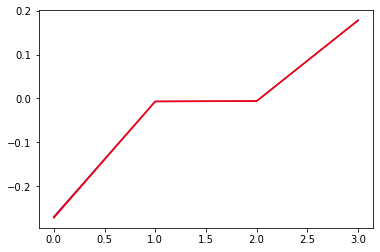

In [36]:
# It is better to plot the coefficient to see the difference
plt.plot(ridg_mod.coef_, color='purple')
plt.plot(Lreg.coef_, c = 'red')
plt.show()

# <center> Fitting Ridge Regression with a Range of Alpha Values